# Pandas practice

Date: Jul 12, 2025

In [2]:
import pandas as pd
import numpy as np

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,2.084045,0.226111,0.551819,-0.660122
2013-01-02,-0.865839,-1.677332,0.685656,0.998937
2013-01-03,-0.478074,0.619694,1.504837,0.472478
2013-01-04,-0.208746,-0.248411,0.957894,0.384935
2013-01-05,0.067296,-1.168382,-0.869983,0.059890
2013-01-06,-0.604784,0.942339,-0.975993,0.930679


In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [7]:
df.head()
df.tail(3)

,A,B,C,D
2013-01-04,-0.208746,-0.248411,0.957894,0.384935
2013-01-05,0.067296,-1.168382,-0.869983,0.059890
2013-01-06,-0.604784,0.942339,-0.975993,0.930679


In [8]:
df.index
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
df.to_numpy()

array([[ 2.08404464,  0.22611134,  0.55181912, -0.66012234],
       [-0.86583868, -1.67733192,  0.68565562,  0.99893698],
       [-0.47807409,  0.61969418,  1.50483669,  0.47247841],
       [-0.20874616, -0.24841112,  0.95789403,  0.38493478],
       [ 0.06729561, -1.16838221, -0.86998278,  0.05988989],
       [-0.60478356,  0.94233939, -0.97599293,  0.93067899]])

In [10]:
df.describe()
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,2.084045,-0.865839,-0.478074,-0.208746,0.067296,-0.604784
B,0.226111,-1.677332,0.619694,-0.248411,-1.168382,0.942339
C,0.551819,0.685656,1.504837,0.957894,-0.869983,-0.975993
D,-0.660122,0.998937,0.472478,0.384935,0.059890,0.930679


In [11]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.660122,0.551819,0.226111,2.084045
2013-01-02,0.998937,0.685656,-1.677332,-0.865839
2013-01-03,0.472478,1.504837,0.619694,-0.478074
2013-01-04,0.384935,0.957894,-0.248411,-0.208746
2013-01-05,0.059890,-0.869983,-1.168382,0.067296
2013-01-06,0.930679,-0.975993,0.942339,-0.604784


In [12]:
df.sort_values(by="C", ascending=False)

,A,B,C,D
2013-01-03,-0.478074,0.619694,1.504837,0.472478
2013-01-04,-0.208746,-0.248411,0.957894,0.384935
2013-01-02,-0.865839,-1.677332,0.685656,0.998937
2013-01-01,2.084045,0.226111,0.551819,-0.660122
2013-01-05,0.067296,-1.168382,-0.869983,0.059890
2013-01-06,-0.604784,0.942339,-0.975993,0.930679


In [13]:
df['A']
df.A
df[0:3]

,A,B,C,D
2013-01-01,2.084045,0.226111,0.551819,-0.660122
2013-01-02,-0.865839,-1.677332,0.685656,0.998937
2013-01-03,-0.478074,0.619694,1.504837,0.472478


In [14]:
df.loc[dates[0]]
df.loc[:, ['A', 'B']]
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.865839,-1.677332
2013-01-03,-0.478074,0.619694
2013-01-04,-0.208746,-0.248411


In [15]:
%time
df.loc['20130102':'20130104', 'A':'B']

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 3.1 μs


,A,B
2013-01-02,-0.865839,-1.677332
2013-01-03,-0.478074,0.619694
2013-01-04,-0.208746,-0.248411


In [16]:
%time
df.loc[dates[0], "A"]

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 1.91 μs


np.float64(2.084044642168766)

In [17]:
%time
df.at[dates[0], "A"]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.15 μs


np.float64(2.084044642168766)

In [18]:
df.iloc[3]
df.iloc[3:5, 0:2]
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.865839,0.685656
2013-01-03,-0.478074,1.504837
2013-01-05,0.067296,-0.869983


In [19]:
df.iloc[1:3, :]
df.iloc[:, 1:3]

,B,C
2013-01-01,0.226111,0.551819
2013-01-02,-1.677332,0.685656
2013-01-03,0.619694,1.504837
2013-01-04,-0.248411,0.957894
2013-01-05,-1.168382,-0.869983
2013-01-06,0.942339,-0.975993


In [20]:
%time
df.iloc[1, 1]


CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs


np.float64(-1.6773319226539405)

In [21]:
%time
df.iat[1, 1]

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 2.15 μs


np.float64(-1.6773319226539405)

In [22]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,2.084045,0.226111,0.551819,-0.660122
2013-01-05,0.067296,-1.168382,-0.869983,0.059890


In [23]:
df[df > 0]

,A,B,C,D
2013-01-01,2.084045,0.226111,0.551819,NaN
2013-01-02,NaN,NaN,0.685656,0.998937
2013-01-03,NaN,0.619694,1.504837,0.472478
2013-01-04,NaN,NaN,0.957894,0.384935
2013-01-05,0.067296,NaN,NaN,0.059890
2013-01-06,NaN,0.942339,NaN,0.930679


In [24]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,2.084045,0.226111,0.551819,-0.660122,one
2013-01-02,-0.865839,-1.677332,0.685656,0.998937,one
2013-01-03,-0.478074,0.619694,1.504837,0.472478,two
2013-01-04,-0.208746,-0.248411,0.957894,0.384935,three
2013-01-05,0.067296,-1.168382,-0.869983,0.059890,four
2013-01-06,-0.604784,0.942339,-0.975993,0.930679,three


In [25]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.478074,0.619694,1.504837,0.472478,two
2013-01-05,0.067296,-1.168382,-0.869983,0.059890,four


In [26]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [27]:
df["F"] = s1

In [28]:
df

,A,B,C,D,F
2013-01-01,2.084045,0.226111,0.551819,-0.660122,NaN
2013-01-02,-0.865839,-1.677332,0.685656,0.998937,1.0
2013-01-03,-0.478074,0.619694,1.504837,0.472478,2.0
2013-01-04,-0.208746,-0.248411,0.957894,0.384935,3.0
2013-01-05,0.067296,-1.168382,-0.869983,0.059890,4.0
2013-01-06,-0.604784,0.942339,-0.975993,0.930679,5.0


In [29]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.226111,0.551819,-0.660122,NaN
2013-01-02,-0.865839,-1.677332,0.685656,0.998937,1.0
2013-01-03,-0.478074,0.619694,1.504837,0.472478,2.0
2013-01-04,-0.208746,-0.248411,0.957894,0.384935,3.0
2013-01-05,0.067296,-1.168382,-0.869983,0.059890,4.0
2013-01-06,-0.604784,0.942339,-0.975993,0.930679,5.0


In [30]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.551819,-0.660122,NaN
2013-01-02,-0.865839,-1.677332,0.685656,0.998937,1.0
2013-01-03,-0.478074,0.619694,1.504837,0.472478,2.0
2013-01-04,-0.208746,-0.248411,0.957894,0.384935,3.0
2013-01-05,0.067296,-1.168382,-0.869983,0.059890,4.0
2013-01-06,-0.604784,0.942339,-0.975993,0.930679,5.0


In [31]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.551819,5.0,NaN
2013-01-02,-0.865839,-1.677332,0.685656,5.0,1.0
2013-01-03,-0.478074,0.619694,1.504837,5.0,2.0
2013-01-04,-0.208746,-0.248411,0.957894,5.0,3.0
2013-01-05,0.067296,-1.168382,-0.869983,5.0,4.0
2013-01-06,-0.604784,0.942339,-0.975993,5.0,5.0


In [32]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.551819,-5.0,NaN
2013-01-02,-0.865839,-1.677332,-0.685656,-5.0,-1.0
2013-01-03,-0.478074,-0.619694,-1.504837,-5.0,-2.0
2013-01-04,-0.208746,-0.248411,-0.957894,-5.0,-3.0
2013-01-05,-0.067296,-1.168382,-0.869983,-5.0,-4.0
2013-01-06,-0.604784,-0.942339,-0.975993,-5.0,-5.0


In [33]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.551819,5.0,NaN,1.0
2013-01-02,-0.865839,-1.677332,0.685656,5.0,1.0,1.0
2013-01-03,-0.478074,0.619694,1.504837,5.0,2.0,NaN
2013-01-04,-0.208746,-0.248411,0.957894,5.0,3.0,NaN


In [34]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.865839,-1.677332,0.685656,5.0,1.0,1.0


In [35]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.551819,5.0,5.0,1.0
2013-01-02,-0.865839,-1.677332,0.685656,5.0,1.0,1.0
2013-01-03,-0.478074,0.619694,1.504837,5.0,2.0,5.0
2013-01-04,-0.208746,-0.248411,0.957894,5.0,3.0,5.0


In [36]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [37]:
df.mean()

A   -0.348358
B   -0.255349
C    0.309038
D    5.000000
F    3.000000
dtype: float64

In [38]:
df.mean(axis=1)

2013-01-01    1.387955
2013-01-02    0.828497
2013-01-03    1.729291
2013-01-04    1.700147
2013-01-05    1.405786
2013-01-06    1.872313
Freq: D, dtype: float64

In [39]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [40]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.478074,-0.380306,0.504837,4.0,1.0
2013-01-04,-3.208746,-3.248411,-2.042106,2.0,0.0
2013-01-05,-4.932704,-6.168382,-5.869983,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.551819,5.0,NaN
2013-01-02,-0.865839,-1.677332,0.685656,5.0,1.0
2013-01-03,-0.478074,0.619694,1.504837,5.0,2.0
2013-01-04,-0.208746,-0.248411,0.957894,5.0,3.0
2013-01-05,0.067296,-1.168382,-0.869983,5.0,4.0
2013-01-06,-0.604784,0.942339,-0.975993,5.0,5.0


In [42]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.950804
B    -1.429952
C     1.730614
D    28.000000
F    16.800000
dtype: float64

In [43]:
df.mean(axis=0)

A   -0.348358
B   -0.255349
C    0.309038
D    5.000000
F    3.000000
dtype: float64

In [44]:
df.agg(lambda x: np.mean(x))

A   -0.348358
B   -0.255349
C    0.309038
D    5.000000
F    3.000000
dtype: float64

In [45]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,55.844095,506.0,NaN
2013-01-02,-87.622875,-169.745991,69.388348,506.0,101.2
2013-01-03,-48.381098,62.713051,152.289473,506.0,202.4
2013-01-04,-21.125111,-25.139205,96.938876,506.0,303.6
2013-01-05,6.810316,-118.240280,-88.042258,506.0,404.8
2013-01-06,-61.204096,95.364746,-98.770484,506.0,506.0


In [46]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.551819,5.0,NaN
2013-01-02,-0.865839,-1.677332,0.685656,5.0,1.0
2013-01-03,-0.478074,0.619694,1.504837,5.0,2.0
2013-01-04,-0.208746,-0.248411,0.957894,5.0,3.0
2013-01-05,0.067296,-1.168382,-0.869983,5.0,4.0
2013-01-06,-0.604784,0.942339,-0.975993,5.0,5.0


In [47]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    2
3    4
4    3
5    6
6    4
7    3
8    2
9    6
dtype: int64

In [48]:
s.value_counts()

2    3
3    3
4    2
6    2
Name: count, dtype: int64

In [49]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [50]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [51]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.158286,0.536648,0.126047,0.963889
1,1.559975,0.855425,0.000006,-0.720556
2,0.356037,-1.723587,-1.134739,-1.413936
3,0.718369,-0.306000,-1.884405,0.386815
4,-0.017130,-1.530558,0.484526,-0.619805
5,-1.991892,-1.483719,-0.264904,-0.041196
6,-0.978850,-0.936186,-0.762142,-0.961537
7,0.035565,-0.967811,-0.170703,1.337989
8,0.113929,-0.813609,0.099370,0.496264
9,-1.092863,-1.640353,-0.989002,0.646884


In [52]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.158286  0.536648  0.126047  0.963889
 1  1.559975  0.855425  0.000006 -0.720556
 2  0.356037 -1.723587 -1.134739 -1.413936,
           0         1         2         3
 3  0.718369 -0.306000 -1.884405  0.386815
 4 -0.017130 -1.530558  0.484526 -0.619805
 5 -1.991892 -1.483719 -0.264904 -0.041196
 6 -0.978850 -0.936186 -0.762142 -0.961537,
           0         1         2         3
 7  0.035565 -0.967811 -0.170703  1.337989
 8  0.113929 -0.813609  0.099370  0.496264
 9 -1.092863 -1.640353 -0.989002  0.646884]

In [53]:
pd.concat(pieces)

,0,1,2,3
0,-1.158286,0.536648,0.126047,0.963889
1,1.559975,0.855425,0.000006,-0.720556
2,0.356037,-1.723587,-1.134739,-1.413936
3,0.718369,-0.306000,-1.884405,0.386815
4,-0.017130,-1.530558,0.484526,-0.619805
5,-1.991892,-1.483719,-0.264904,-0.041196
6,-0.978850,-0.936186,-0.762142,-0.961537
7,0.035565,-0.967811,-0.170703,1.337989
8,0.113929,-0.813609,0.099370,0.496264
9,-1.092863,-1.640353,-0.989002,0.646884


In [54]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [55]:

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [56]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [57]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [58]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [59]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.246189,-0.765872
1,bar,one,-0.882933,0.245073
2,foo,two,0.844568,-1.010179
3,bar,three,-0.396093,0.504317
4,foo,two,-0.330167,0.465731
5,bar,two,-0.138428,-0.520519
6,foo,one,-0.234876,0.153561
7,foo,three,-1.481561,0.658381


In [60]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.417455,0.228870
foo,-0.955846,-0.498378


In [61]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.882933  0.245073
    three -0.396093  0.504317
    two   -0.138428 -0.520519
foo one    0.011314 -0.612311
    three -1.481561  0.658381
    two    0.514401 -0.544448

In [62]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [63]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.034699  1.111455
      two     0.421305 -0.661841
baz   one     1.635720  0.680921
      two     0.493058 -0.254147
foo   one     0.800269 -0.027064
      two     0.569019 -1.487433
qux   one    -1.145310 -0.319710
      two    -0.767698  0.395100

In [64]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.034699  1.111455
      two     0.421305 -0.661841
baz   one     1.635720  0.680921
      two     0.493058 -0.254147

In [65]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.034699
               B    1.111455
       two     A    0.421305
               B   -0.661841
baz    one     A    1.635720
               B    0.680921
       two     A    0.493058
               B   -0.254147
dtype: float64

In [66]:
stacked.unstack()

A         B
first second                    
bar   one    -0.034699  1.111455
      two     0.421305 -0.661841
baz   one     1.635720  0.680921
      two     0.493058 -0.254147

In [67]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.034699  0.421305
      B  1.111455 -0.661841
baz   A  1.635720  0.493058
      B  0.680921 -0.254147

In [68]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.034699  1.635720
       B  1.111455  0.680921
two    A  0.421305  0.493058
       B -0.661841 -0.254147

In [69]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.993972,-0.507284
1,one,B,foo,1.134663,1.110240
2,two,C,foo,2.706799,0.127595
3,three,A,bar,0.797641,-0.020403
4,one,B,bar,-0.281502,-0.798123
5,one,C,bar,0.539051,-0.747520
6,two,A,foo,-1.030127,1.015219
7,three,B,foo,0.208322,1.368513
8,one,C,foo,-0.961030,0.044601
9,one,A,bar,0.276513,1.723355


In [70]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.276513 -1.993972
      B -0.281502  1.134663
      C  0.539051 -0.961030
three A  0.797641       NaN
      B       NaN  0.208322
      C  0.796862       NaN
two   A       NaN -1.030127
      B -0.361174       NaN
      C       NaN  2.706799

In [71]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [72]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    216
2012-01-01 00:00:01     12
2012-01-01 00:00:02    314
2012-01-01 00:00:03    325
2012-01-01 00:00:04    360
                      ... 
2012-01-01 00:01:35    195
2012-01-01 00:01:36    465
2012-01-01 00:01:37    263
2012-01-01 00:01:38    384
2012-01-01 00:01:39    381
Freq: s, Length: 100, dtype: int64

In [73]:
ts.resample("5Min").sum()

2012-01-01    25423
Freq: 5min, dtype: int64

In [74]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [75]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.114919
2012-03-07   -0.361204
2012-03-08   -0.146597
2012-03-09   -0.713862
2012-03-10   -1.018390
Freq: D, dtype: float64

In [76]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.114919
2012-03-07 00:00:00+00:00   -0.361204
2012-03-08 00:00:00+00:00   -0.146597
2012-03-09 00:00:00+00:00   -0.713862
2012-03-10 00:00:00+00:00   -1.018390
Freq: D, dtype: float64

In [77]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.114919
2012-03-06 19:00:00-05:00   -0.361204
2012-03-07 19:00:00-05:00   -0.146597
2012-03-08 19:00:00-05:00   -0.713862
2012-03-09 19:00:00-05:00   -1.018390
Freq: D, dtype: float64

In [78]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [79]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

In [80]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [81]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [82]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [83]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [84]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [85]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [86]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [87]:
import matplotlib.pyplot as plt
plt.close("all")

In [88]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01    0.491116
2000-01-02   -0.198715
2000-01-03    1.842148
2000-01-04   -1.033690
2000-01-05   -0.684134
                ...   
2002-09-22    0.898890
2002-09-23    0.488538
2002-09-24   -0.021762
2002-09-25   -0.182587
2002-09-26   -0.794720
Freq: D, Length: 1000, dtype: float64

In [89]:
ts = ts.cumsum()
ts

2000-01-01     0.491116
2000-01-02     0.292401
2000-01-03     2.134549
2000-01-04     1.100859
2000-01-05     0.416726
                ...    
2002-09-22    28.479251
2002-09-23    28.967789
2002-09-24    28.946027
2002-09-25    28.763440
2002-09-26    27.968720
Freq: D, Length: 1000, dtype: float64

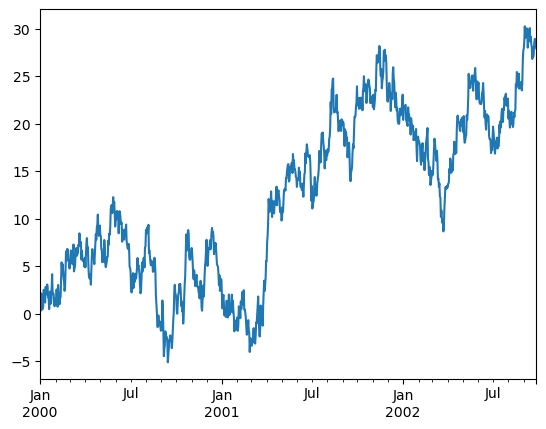

In [90]:
ts.plot();

In [91]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,0.409852,-1.345643,1.843490,-0.371611
2000-01-02,-1.130764,-0.547247,-0.242317,1.380818
2000-01-03,0.349111,0.854500,0.665034,-1.300892
2000-01-04,-0.134591,-0.092442,0.772664,-0.112164
2000-01-05,-0.386436,0.935055,-0.628305,0.006402
...,...,...,...,...
2002-09-22,0.372042,-0.266143,-0.464226,0.560971
2002-09-23,-0.175812,-1.453531,1.069373,-0.355640
2002-09-24,-0.116552,0.245577,0.360371,-0.565610
2002-09-25,-0.112662,-1.388595,1.094778,-0.830489


In [92]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.409852,-1.345643,1.843490,-0.371611
2000-01-02,-0.720912,-1.892890,1.601173,1.009207
2000-01-03,-0.371801,-1.038390,2.266207,-0.291684
2000-01-04,-0.506392,-1.130832,3.038871,-0.403848
2000-01-05,-0.892828,-0.195777,2.410566,-0.397447
...,...,...,...,...
2002-09-22,14.510384,7.368591,-36.191657,-7.785904
2002-09-23,14.334572,5.915061,-35.122284,-8.141544
2002-09-24,14.218020,6.160638,-34.761913,-8.707154
2002-09-25,14.105359,4.772043,-33.667136,-9.537643


<Figure size 640x480 with 0 Axes>

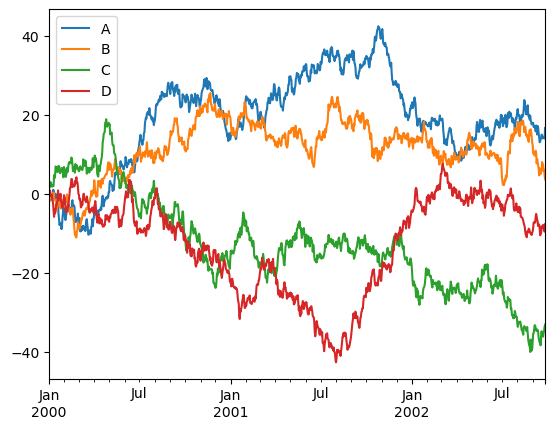

In [93]:
plt.figure();
df.plot();
plt.legend(loc='best');

In [94]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

In [95]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0,0,0,1,1
1,1,3,1,3,3,1
2,2,2,1,4,2,1
3,3,1,1,1,3,2
4,4,1,1,1,4,4
5,5,1,0,2,3,3
6,6,4,0,1,2,1
7,7,0,3,1,1,2
8,8,0,4,1,0,0
9,9,4,4,2,3,0


In [96]:
df.to_parquet("foo.parquet")

In [97]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,0,0,0,1,1
1,3,1,3,3,1
2,2,1,4,2,1
3,1,1,1,3,2
4,1,1,1,4,4
5,1,0,2,3,3
6,4,0,1,2,1
7,0,3,1,1,2
8,0,4,1,0,0
9,4,4,2,3,0


In [98]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [99]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,0,0,1,1
1,1,3,1,3,3,1
2,2,2,1,4,2,1
3,3,1,1,1,3,2
4,4,1,1,1,4,4
5,5,1,0,2,3,3
6,6,4,0,1,2,1
7,7,0,3,1,1,2
8,8,0,4,1,0,0
9,9,4,4,2,3,0
